# External Lab 

Here each question is of 1 mark.

# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [334]:
import numpy as np
import pandas as pd

In [335]:
petroldata=pd.read_csv("petrol.csv")
petroldata.info()
petroldata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax             48 non-null float64
 income         48 non-null int64
 highway        48 non-null int64
 dl             48 non-null float64
 consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


,tax,income,highway,dl,consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [336]:
petroldata.columns = petroldata.columns.str.strip()

In [337]:
Q1, Q3= np.percentile(petroldata["consumption"],[25,75])
print("Q1 is: ",Q1)
print("Q3 is: ",Q3)
IQR = Q3-Q1
print("Inter quartile range is: ",IQR)

Q1 is:  509.5
Q3 is:  632.75
Inter quartile range is:  123.25


In [338]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
print('Lower bound :', Lower_bound, "\n",  'Upper bound :', Upper_bound)

Lower bound : 324.625 
 Upper bound : 817.625


In [339]:
#filtered = petroldata.query('(@Q1 - (1.5 * @IQR)) <= consumption <= (@Q3 + (1.5 * @IQR))')
filtered = petroldata.query('@Lower_bound <= consumption <= @Upper_bound')
#print(filtered)
print(filtered.shape)

(46, 5)


In [340]:
Q1, Q3= np.percentile(filtered["dl"],[25,75])
print("Q1 is: ",Q1)
print("Q3 is: ",Q3)
IQR = Q3-Q1
print("Inter quartile range is: ",IQR)
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
print('Lower bound :', Lower_bound, "\n",  'Upper bound :', Upper_bound)
filtered = filtered.query('@Lower_bound <= dl <= @Upper_bound')
#print(filtered)
print(filtered.shape)

Q1 is:  0.52925
Q3 is:  0.586
Inter quartile range is:  0.05674999999999997
Lower bound : 0.44412500000000005 
 Upper bound : 0.671125
(44, 5)


In [341]:
Q1, Q3= np.percentile(filtered["highway"],[25,75])
print("Q1 is: ",Q1)
print("Q3 is: ",Q3)
IQR = Q3-Q1
print("Inter quartile range is: ",IQR)
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
print('Lower bound :', Lower_bound, "\n",  'Upper bound :', Upper_bound)
filtered = filtered.query('@Lower_bound <= highway <= @Upper_bound')
#print(filtered)
print(filtered.shape)

Q1 is:  3110.25
Q3 is:  7834.0
Inter quartile range is:  4723.75
Lower bound : -3975.375 
 Upper bound : 14919.625
(43, 5)


In [342]:
Q1, Q3= np.percentile(filtered["income"],[25,75])
print("Q1 is: ",Q1)
print("Q3 is: ",Q3)
IQR = Q3-Q1
print("Inter quartile range is: ",IQR)
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
print('Lower bound :', Lower_bound, "\n",  'Upper bound :', Upper_bound)
filtered = filtered.query('@Lower_bound <= income <= @Upper_bound')
#print(filtered)
print(filtered.shape)

Q1 is:  3719.5
Q3 is:  4543.0
Inter quartile range is:  823.5
Lower bound : 2484.25 
 Upper bound : 5778.25
(43, 5)


In [343]:
Q1, Q3= np.percentile(filtered["tax"],[25,75])
print("Q1 is: ",Q1)
print("Q3 is: ",Q3)
IQR = Q3-Q1
print("Inter quartile range is: ",IQR)
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
Lower_bound = Q1 - (1.5*IQR)
Upper_bound = Q3 + (1.5*IQR)
print('Lower bound :', Lower_bound, "\n",  'Upper bound :', Upper_bound)
filtered = filtered.query('@Lower_bound <= tax <= @Upper_bound')
#print(filtered)
print(filtered.shape)

Q1 is:  7.0
Q3 is:  8.25
Inter quartile range is:  1.25
Lower bound : 5.125 
 Upper bound : 10.125
(43, 5)


# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [344]:
#petroldata.corr()
filtered.corr()

,tax,income,highway,dl,consumption
tax,1.000000,0.090934,-0.489964,-0.263974,-0.422414
income,0.090934,1.000000,0.131251,0.023500,-0.575419
highway,-0.489964,0.131251,1.000000,-0.037168,0.054160
dl,-0.263974,0.023500,-0.037168,1.000000,0.534119
consumption,-0.422414,-0.575419,0.054160,0.534119,1.000000


In [345]:
#from the above matrix, we can say CONSUMPTION is highly correlated with DL(positive) and to some extent with TAX(negative)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024329121F60>,
      dtype=object)

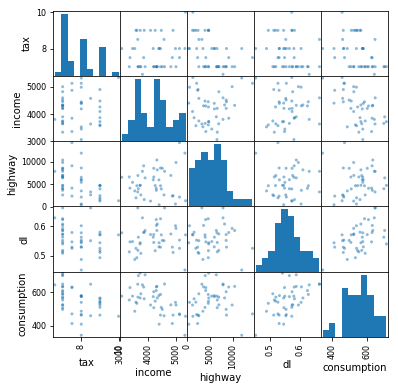

In [346]:
#if we try to view graphically ...
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
scatter_matrix(filtered, figsize=(6, 6))
#plt.show()

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [347]:
# Build X dataframe. Drop 'consumption' since it is depedendent variable. And also drop others since correlation is too low.
#X = petroldata.drop(['consumption','tax','income','highway'], axis=1)

# Copy the 'consumption' column alone into the y dataframe. This is the dependent variable
#y = petroldata[['consumption']]


##RESULT: Got 25% accuracy with only DL as feature

In [348]:
# Build X dataframe. Drop 'consumption' since it is depedendent variable. And also drop others since correlation is too low.
X = filtered.drop(['consumption','income','highway'], axis=1)

# Copy the 'consumption' column alone into the y dataframe. This is the dependent variable
y = filtered[['consumption']]


In [349]:
print(X.shape,y.shape)

(43, 2) (43, 1)


# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [350]:
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [354]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(34, 2) (9, 2) (34, 1) (9, 1)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [356]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [357]:
# Coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for tax is -21.92543042425606
The coefficient for dl is 889.2115319878538


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [359]:
# Model score 
regression_model.score(X_test, y_test)

-0.19134910581140763

In [360]:
# So the model explains 27% of the variability in Y using X
# trying polynomial models (quadratic)

In [361]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

poly = PolynomialFeatures(degree=2, interaction_only=True)
X_train_ = poly.fit_transform(X_train)

X_test_ = poly.fit_transform(X_test)

poly_clf = linear_model.LinearRegression()

poly_clf.fit(X_train_, y_train)

y_pred = poly_clf.predict(X_test_)

print(poly_clf.score(X_test_, y_test))

-0.28006367473891114


# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [362]:
# Build X dataframe. Drop 'consumption' since it is depedendent variable. And also drop others except income and highways.
X = filtered.drop(['consumption'], axis=1)

# Copy the 'consumption' column alone into the y dataframe. This is the dependent variable
y = filtered[['consumption']]

print(X.shape, y.shape)

(43, 4) (43, 1)


In [363]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34, 4) (9, 4) (34, 1) (9, 1)


In [364]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model2 = LinearRegression()
regression_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [365]:
# Model score 
regression_model2.score(X_test, y_test)

0.1889401188952724

# Question 9: Print the coefficients of the multilinear regression model

In [367]:
# Coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[0][idx]))

The coefficient for tax is -5.604762380702257
The coefficient for income is -0.0761953606580582
The coefficient for highway is 0.0038052830895245623
The coefficient for dl is 1016.5374028220413


# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### *R squared value increase if we increase the number of independent variables to our analysis

In [ ]:
Regression model score increased with addition of independent variables to the analysis. 
